# Examine tuning patterns of model hidden units

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
import scipy.stats

from trajectory import TrajectoryGenerator
from fileio import load_run
from parameters import print_params

from ratemaps import compute_ratemaps, plot_ratemaps, 

## Load model

In [2]:
# Directory where model is loaded from
RUN_DIRNAME = '20220514_01'
RUN_DIRPATH = f'models/{RUN_DIRNAME}'

run_params, model = load_run(RUN_DIRPATH)
print_params(run_params)

model:
  n_units: 100
  output_bias: false
  rnn_bias: true
num_batches: 8000
num_epochs: 1
test_batch_size: 500
trainer:
  batch_size: 500
  lambda_h: 4.0
  lambda_w: 0.5
  learning_rate: 0.0001
trajectory:
  boundary_height: 2.0
  boundary_shape: square
  coordinates: cartesian
  mean_speed: 0.2
  n_steps: 450
  rng_seed: 1993
  std_norm: 0.5
  time_step: 0.1



## Ratemaps

### Run model on simulation and compute ratemaps

In [3]:
# Use trajectory generator with different random seed for test data
new_seed = run_params['trajectory']['rng_seed'] + 1
traj_params = dict(run_params['trajectory'], rng_seed=new_seed)
tgen = TrajectoryGenerator(**traj_params)

# Compute ratemaps
activations, pos, h = compute_ratemaps(model, tgen)

### Plot ratemaps

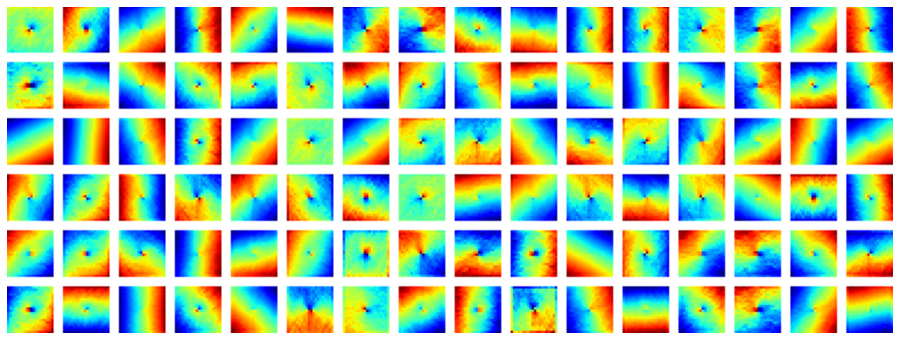

In [4]:
# Plot all cells
n_plot = model.n_units

# Figure size
plt.figure(figsize=(16, 4 * n_plot // 8**2))

# Ratemap plot
rm_fig = plot_ratemaps(activations, n_plot)
plt.imshow(rm_fig)
plt.axis('off')

plt.savefig(f'{RUN_DIRNAME}_tuning.png')

###  Activity histogram

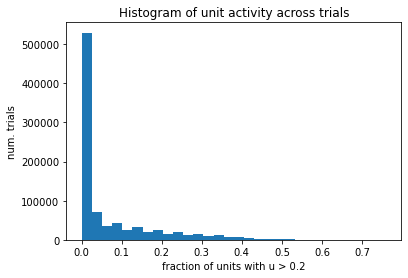

In [5]:
# Threshold above which cell is considered "active"
th = 0.2

# Compute fraction of cells at each time point that are active
pct_active = np.count_nonzero(np.abs(h) > th, axis=1) / 100

# Plot histogram of activity rates
plt.hist(pct_active, bins=30);
plt.title('Histogram of unit activity across trials')
plt.xlabel(f'fraction of units with u > {th}')
plt.ylabel('num. trials')

plt.savefig(f'{RUN_DIRNAME}_activity.png')